<a href="https://colab.research.google.com/github/j23-cs167/project-2-vcarioti/blob/main/Project2_Carioti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Vince Carioti

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I am trying to solve the problem of discovering how well a Convolutional Neural Network can classify Pictures of the following unique class settings: {Buildings, Forests, Glaciers, Mountains, Seas, Streets}. The data set I am using is comprised of image data (14000 training, 3000 testing) including the above listed natural scenes, and was found on Kaggle under the name 'Intel Image Classification.' The goal of this experiment is to correctly classify as many of the natural scenes in each of these images as possible.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

Data preparation for this experiment was relatively simple. I started by importing all keras packages and connecting to Google Drive. I then defined the image dimensions and batch size, specified paths for training and testing data, and rescaled my pixel values to 0 to 1 from 0 to 255. Finally, I defined my training and testing data 

In [2]:
# load and prepare your data here
import keras
import tensorflow 
import sys
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 150
img_height = 150

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/Datasets/project2/seg_train/seg_train' 
test_data_dir = '/content/drive/MyDrive/Datasets/project2/seg_test/seg_test'

## To feed the training images to the neural network in batches of 32 images 
batch_size = 64

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and classifying based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 14039 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# 3. Research

Put your code and your experiments here.

In [3]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
# Building my CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [4]:
#training and testing the first model 
training_results = model.fit(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
220/220 [==============================] - 3920s 18s/step - loss: nan - accuracy: 0.1566 - val_loss: nan - val_accuracy: 0.1457
Epoch 2/10
220/220 [==============================] - 37s 169ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 3/10
220/220 [==============================] - 39s 175ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 4/10
220/220 [==============================] - 38s 174ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 5/10
220/220 [==============================] - 38s 173ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 6/10
220/220 [==============================] - 38s 172ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 7/10
220/220 [==============================] - 37s 169ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 8/10
220/220 [=======

In [ ]:
# Subtracted a conv and pool layer as well as adjusted batch size above. 
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model2.add(Dense(64)) #fully-connected layer
model2.add(Dense(1,activation='sigmoid'))
opt2 = SGD(learning_rate=0.001, momentum=0.9)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

In [ ]:
#training and testing 2nd model
training_results2 = model2.fit(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/20
220/220 [==============================] - 40s 183ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 2/20
220/220 [==============================] - 40s 180ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 3/20
220/220 [==============================] - 38s 175ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 4/20
220/220 [==============================] - 38s 174ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 5/20
220/220 [==============================] - 38s 175ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 6/20
220/220 [==============================] - 41s 184ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 7/20
220/220 [==============================] - 39s 175ms/step - loss: nan - accuracy: 0.1564 - val_loss: nan - val_accuracy: 0.1457
Epoch 8/20
220/220 [=======

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title(' Default model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

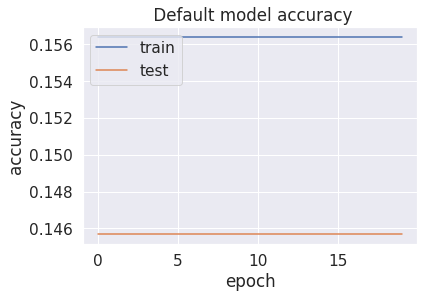

In [ ]:
#This Graph is representative of both models, as the training and testing accuracy did not change from the first epoch
#Sososososo frustrating
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title(' CNN with 20 epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#4. Analysis
What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

From these experiments, I've discovered that using this specific model of convolutional neural network on this dataset is not accurate at classifying images. After running a multitude of CNN's and changing different variables such as batch size, number of epochs, which optimizer was used, and what type of loss metric was used, my accuracy of the CNN did not change. I found it interesting that my models were less than 20% accurate, and what I found more interesting was the fact that the accuracy never changed from 15%. I'm really not sure what caused this to happen even after I changed the structure and variables of the model. 

As far as recommendations I have, I would recommend either a different classification model (if available) or to follow the way that the creator of the Kaggle dataset loaded their data and created their model. Rather than splitting up the training and testing data with a datagen function to resize the pixels, the creator of the dataset made a different type of function and added two more variables: test_predictions and train_predictions. He was able to use these arrays with labels to classify the images and make a model that was monumentally more accurate at identifying which type of image was which. 

To summarize my results, I will state that with these created convolutional neural networks and this dataset, it's highly difficult to get even 16% accurate, making it hardly a viable model. 

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I actually encountered a multitude of problems while working on this project. The first problem started when my first model finished epoch 1/20 then froze for an hour. I refreshed the page and ran it again and the same thing happened, so I made a new model with less epochs and the same optimizer and loss metric that the creator of the kaggle dataset used. When nothing changed with that model, I decided to add a convolutional layer and a pooling layer, which made it take slightly longer and had the same result. Finally, I tried the exact same simple model setup that seemed to get the kaggle creator upwards of 90% accuracy, which had less layers in all, and it was still the exact same. 

I really don't know if I just messed something up so incredibly bad and that's why model is inaccurate, but I really struggled with tweaking a lot of different things on this and still got the exact same results every time over the course of days. 